## Loading the Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing dataset
folder_path = "dataset/"
train_x_file = "AMF_train_X_XCZw8r3.csv"
train_y_file = "AMF_train_Y_omYQJZL.csv"
test_x_file = "AMF_test_X_uDs0jHH.csv"
train_X = pd.read_csv(folder_path + train_x_file)
train_y = pd.read_csv(folder_path + train_y_file)
test_X = pd.read_csv(folder_path + test_x_file)

In [3]:
# Merging train data X and y
train_df = train_X.merge(train_y, on='Trader')

## Data Preprocessing

#### adding column difference med_dt_TV1_TV2/mean_dt_TV1_TV2

In [46]:
train_df['TV_mean_med_difference'] = train_df['med_dt_TV1']/train_df['mean_dt_TV1']

#### adding number of lines per trader

In [47]:
n_lines = train_df.groupby('Trader').count().Index

In [48]:
train_df = train_df.merge(n_lines, on='Trader',suffixes=('', '_number_of_lines'))

In [49]:
# Need numerical values to calculate correlation between data
train_df = train_df.replace(['NON HFT', 'MIX', 'HFT'], [0, 1, 2])

In [50]:
# Keeping the 35 features and the output
columns_to_keep = list(train_df.columns)[4:]
train_df = train_df[columns_to_keep]

In [51]:
log_cols = ['OCR','OTR','OMR','NbSecondWithAtLeatOneTrade','MaxNbTradesBySecond','MeanNbTradesBySecond','min_lifetime_cancel','mean_lifetime_cancel','med_time_two_events','TV_mean_med_difference','med_lifetime_cancel','med_dt_TV1_TV2','mean_dt_TV1_TV3', 'med_dt_TV1_TV3', 'med_dt_TV1_TV4','Index_number_of_lines']
log_plus_one_cols=['mean_dt_TV1','mean_dt_TV1_TV2','90_p_time_two_events','mean_time_two_events', '75_p_time_two_events','75_p_lifetime_cancel','90_p_lifetime_cancel','med_dt_TV1','mean_dt_TV1_TV4']
identity_cols=['NbTradeVenueMic','max_time_two_events', '25_p_time_two_events', 'max_lifetime_cancel','min_time_two_events','10_p_time_two_events','10_p_lifetime_cancel','25_p_lifetime_cancel','min_dt_TV1','min_dt_TV1_TV2','min_dt_TV1_TV3','min_dt_TV1_TV4','Target']

In [52]:
train_df[log_plus_one_cols] = np.log1p(train_df[log_plus_one_cols])
train_df[log_cols] = np.log1p(train_df[log_cols] + 1e-4)

## Some visualization

In [53]:
df = train_df

In [54]:
df.head(5)

OTR       OCR       OMR  min_time_two_events  mean_time_two_events  \
0  1.185654  2.233603  2.602697                  0.0              8.540681   
1  0.992040  3.264490  3.116689                  0.0              7.521842   
2  0.909411  3.877434  4.781223                  0.0              6.532772   
3  0.995465  2.740846  3.401201                  0.0              7.684938   
4  0.923398  3.323239       NaN                  0.0              6.851194   

   10_p_time_two_events  med_time_two_events  25_p_time_two_events  \
0              0.000000             6.041893             10.722543   
1              0.000074             0.003468              0.000204   
2              0.000071             0.000699              0.000129   
3              0.000000             1.967499              0.000945   
4              0.000071             0.001463              0.000146   

   75_p_time_two_events  90_p_time_two_events  ...  min_dt_TV1_TV3  \
0              6.892967             10.049873  ...             NaN   
1              2.279183              7.890765  ...             NaN   
2              1.905895              6.108989  ...             NaN   
3              4.150160              9.862078  ...             NaN   
4              1.171063              5.614794  ...             NaN   

   mean_dt_TV1_TV3  med_dt_TV1_TV3  min_dt_TV1_TV4  mean_dt_TV1_TV4  \
0              NaN             NaN             NaN              NaN   
1              NaN             NaN             NaN              NaN   
2              NaN             NaN             NaN              NaN   
3              NaN             NaN             NaN              NaN   
4              NaN             NaN             NaN              NaN   

   med_dt_TV1_TV4  NbSecondWithAtLeatOneTrade  type  TV_mean_med_difference  \
0             NaN                    1.609458     0                0.152327   
1             NaN                    2.772595     0                0.000102   
2             NaN                    4.158885     0                0.000105   
3             NaN                    1.609458     0                0.000103   
4             NaN                    3.663564     0                0.000105   

   Index_number_of_lines  
0                4.35671  
1                4.35671  
2                4.35671  
3                4.35671  
4                4.35671  

[5 rows x 38 columns]

In [55]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105782 entries, 0 to 105781
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   OTR                         104099 non-null  float64
 1   OCR                         105782 non-null  float64
 2   OMR                         58170 non-null   float64
 3   min_time_two_events         105782 non-null  float64
 4   mean_time_two_events        105782 non-null  float64
 5   10_p_time_two_events        105782 non-null  float64
 6   med_time_two_events         105782 non-null  float64
 7   25_p_time_two_events        105782 non-null  float64
 8   75_p_time_two_events        105782 non-null  float64
 9   90_p_time_two_events        105782 non-null  float64
 10  max_time_two_events         105782 non-null  float64
 11  min_lifetime_cancel         105782 non-null  float64
 12  mean_lifetime_cancel        105782 non-null  float64
 13  10_p_lifetime_

(None, (105782, 38))

array([[<AxesSubplot:title={'center':'OTR'}>,
        <AxesSubplot:title={'center':'OCR'}>,
        <AxesSubplot:title={'center':'OMR'}>,
        <AxesSubplot:title={'center':'min_time_two_events'}>,
        <AxesSubplot:title={'center':'mean_time_two_events'}>,
        <AxesSubplot:title={'center':'10_p_time_two_events'}>],
       [<AxesSubplot:title={'center':'med_time_two_events'}>,
        <AxesSubplot:title={'center':'25_p_time_two_events'}>,
        <AxesSubplot:title={'center':'75_p_time_two_events'}>,
        <AxesSubplot:title={'center':'90_p_time_two_events'}>,
        <AxesSubplot:title={'center':'max_time_two_events'}>,
        <AxesSubplot:title={'center':'min_lifetime_cancel'}>],
       [<AxesSubplot:title={'center':'mean_lifetime_cancel'}>,
        <AxesSubplot:title={'center':'10_p_lifetime_cancel'}>,
        <AxesSubplot:title={'center':'med_lifetime_cancel'}>,
        <AxesSubplot:title={'center':'25_p_lifetime_cancel'}>,
        <AxesSubplot:title={'center':'75_p_lif

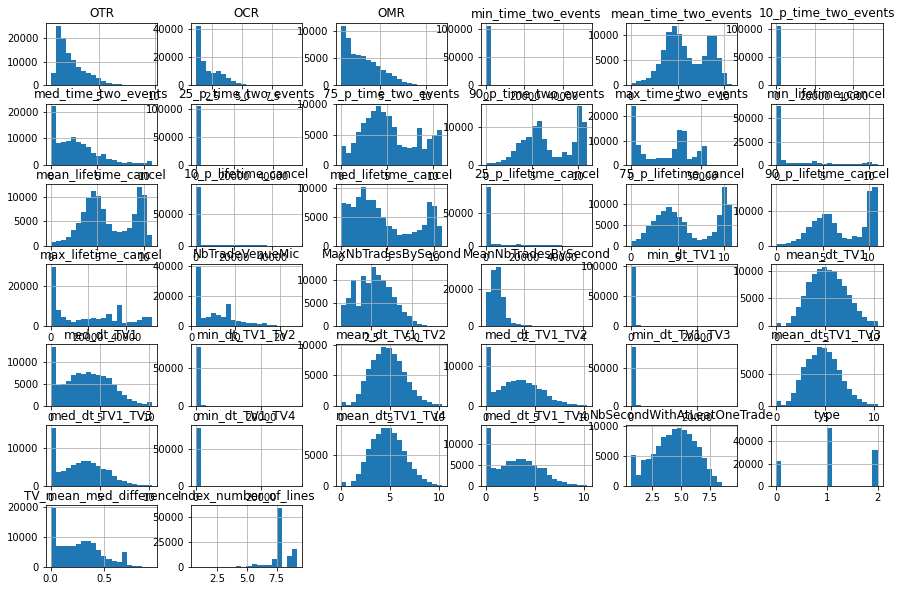

In [56]:
df.hist(bins=20, figsize=(15,10))

## Correlation analysis

In [57]:
# Computing correlation table, excluding NA/null values
abs(df.corr())

OTR       OCR       OMR  min_time_two_events  \
OTR                         1.000000  0.414869  0.319170             0.005719   
OCR                         0.414869  1.000000  0.173539             0.006088   
OMR                         0.319170  0.173539  1.000000             0.015710   
min_time_two_events         0.005719  0.006088  0.015710             1.000000   
mean_time_two_events        0.413873  0.428788  0.147540             0.103374   
10_p_time_two_events        0.009189  0.001969  0.002123             0.960057   
med_time_two_events         0.074271  0.096611  0.122521             0.163972   
25_p_time_two_events        0.024388  0.035284  0.017285             0.676722   
75_p_time_two_events        0.221664  0.278490  0.019603             0.096817   
90_p_time_two_events        0.245377  0.325124  0.049066             0.070966   
max_time_two_events         0.303761  0.229178  0.056044             0.028332   
min_lifetime_cancel         0.261968  0.614165  0.177414             0.143627   
mean_lifetime_cancel        0.289927  0.545109  0.105723             0.083262   
10_p_lifetime_cancel        0.051503  0.359027  0.179126             0.229458   
med_lifetime_cancel         0.317110  0.583217  0.076017             0.095735   
25_p_lifetime_cancel        0.082873  0.374904  0.147992             0.203099   
75_p_lifetime_cancel        0.249166  0.520022  0.107243             0.074721   
90_p_lifetime_cancel        0.170791  0.440658  0.112634             0.063630   
max_lifetime_cancel         0.160068  0.226617  0.117700             0.037732   
NbTradeVenueMic             0.080884  0.370006  0.365821             0.055133   
MaxNbTradesBySecond         0.062555  0.225146  0.185570             0.067986   
MeanNbTradesBySecond        0.074066  0.058851  0.129664             0.045541   
min_dt_TV1                  0.054896  0.094712  0.141727             0.016383   
mean_dt_TV1                 0.172671  0.392868  0.154925             0.001662   
med_dt_TV1                  0.187666  0.367518  0.203727             0.011018   
min_dt_TV1_TV2              0.003286  0.105837  0.131299             0.017949   
mean_dt_TV1_TV2             0.175187  0.325160  0.045684             0.001392   
med_dt_TV1_TV2              0.252758  0.367415  0.073091             0.014835   
min_dt_TV1_TV3              0.004653  0.106758  0.132504             0.013426   
mean_dt_TV1_TV3             0.180988  0.325303  0.035796             0.000426   
med_dt_TV1_TV3              0.235742  0.360334  0.063288             0.013214   
min_dt_TV1_TV4              0.002777  0.108482  0.135364             0.016034   
mean_dt_TV1_TV4             0.164784  0.319201  0.051939             0.001482   
med_dt_TV1_TV4              0.216383  0.345835  0.089339             0.014156   
NbSecondWithAtLeatOneTrade  0.122275  0.365030  0.205660             0.064626   
type                        0.485041  0.522091  0.008107             0.070129   
TV_mean_med_difference      0.145701  0.232468  0.183342             0.038918   
Index_number_of_lines       0.182684  0.255614  0.021938             0.077205   

                            mean_time_two_events  10_p_time_two_events  \
OTR                                     0.413873              0.009189   
OCR                                     0.428788              0.001969   
OMR                                     0.147540              0.002123   
min_time_two_events                     0.103374              0.960057   
mean_time_two_events                    1.000000              0.115935   
10_p_time_two_events                    0.115935              1.000000   
med_time_two_events                     0.562306              0.185055   
25_p_time_two_events                    0.175057              0.758248   
75_p_time_two_events                    0.769785              0.109006   
90_p_time_two_events                    0.814352              0.079980   
max_time_two_events                     0.641283           

### Correlation with the output 
We will delete the features that are not correlated with the output.

In [58]:
abs(df.corr()['type']).sort_values(ascending=False)

type                          1.000000
OCR                           0.522091
min_lifetime_cancel           0.498428
med_lifetime_cancel           0.485366
OTR                           0.485041
mean_time_two_events          0.459873
mean_lifetime_cancel          0.449176
75_p_lifetime_cancel          0.438301
med_dt_TV1_TV2                0.384012
med_dt_TV1                    0.380708
NbTradeVenueMic               0.379408
90_p_time_two_events          0.377620
90_p_lifetime_cancel          0.368439
75_p_time_two_events          0.362257
med_dt_TV1_TV3                0.358613
max_time_two_events           0.346483
med_dt_TV1_TV4                0.341487
mean_dt_TV1                   0.335219
Index_number_of_lines         0.322844
TV_mean_med_difference        0.297462
NbSecondWithAtLeatOneTrade    0.294218
10_p_lifetime_cancel          0.261134
max_lifetime_cancel           0.260645
25_p_lifetime_cancel          0.247415
med_time_two_events           0.238865
mean_dt_TV1_TV2          

<b> To delete : <br>
    'min_dt_TV1','OMR','25_p_time_two_events', '10_p_time_two_events', 'min_dt_TV1_TV4', 'min_time_two_events', 'min_dt_TV1_TV2', 'min_dt_TV1_TV3'

### Correlation between features

In [59]:
abs(df.corr()['OCR']).sort_values(ascending=False)[1:5]

min_lifetime_cancel     0.614165
med_lifetime_cancel     0.583217
mean_lifetime_cancel    0.545109
type                    0.522091
Name: OCR, dtype: float64

In [60]:
abs(df.corr()['min_lifetime_cancel']).sort_values(ascending=False)[1:5]

med_lifetime_cancel     0.784785
25_p_lifetime_cancel    0.735472
10_p_lifetime_cancel    0.728969
mean_lifetime_cancel    0.678747
Name: min_lifetime_cancel, dtype: float64

In [61]:
abs(df.corr()['med_lifetime_cancel']).sort_values(ascending=False)[1:5]

mean_lifetime_cancel    0.870476
75_p_lifetime_cancel    0.869871
min_lifetime_cancel     0.784785
90_p_lifetime_cancel    0.766780
Name: med_lifetime_cancel, dtype: float64

In [62]:
abs(df.corr()['OTR']).sort_values(ascending=False)[1:5]

type                    0.485041
OCR                     0.414869
mean_time_two_events    0.413873
OMR                     0.319170
Name: OTR, dtype: float64

In [63]:
abs(df.corr()['mean_time_two_events']).sort_values(ascending=False)[1:5]

mean_lifetime_cancel    0.860246
90_p_time_two_events    0.814352
75_p_time_two_events    0.769785
med_lifetime_cancel     0.762078
Name: mean_time_two_events, dtype: float64

In [64]:
abs(df.corr()['mean_lifetime_cancel']).sort_values(ascending=False)[1:5]

75_p_lifetime_cancel    0.877601
90_p_lifetime_cancel    0.871971
med_lifetime_cancel     0.870476
mean_time_two_events    0.860246
Name: mean_lifetime_cancel, dtype: float64

In [65]:
abs(df.corr()['75_p_lifetime_cancel']).sort_values(ascending=False)[1:5]

90_p_lifetime_cancel    0.907559
mean_lifetime_cancel    0.877601
med_lifetime_cancel     0.869871
mean_time_two_events    0.751959
Name: 75_p_lifetime_cancel, dtype: float64

<b> To delete : <br>
    '90_p_lifetime_cancel', 

In [66]:
abs(df.corr()['med_dt_TV1_TV2']).sort_values(ascending=False)[1:5]

med_dt_TV1_TV3     0.929563
med_dt_TV1_TV4     0.916603
mean_dt_TV1_TV2    0.771449
mean_dt_TV1_TV3    0.755608
Name: med_dt_TV1_TV2, dtype: float64

<b> To delete : <br>
    'med_dt_TV1_TV3', 'med_dt_TV1_TV4'

In [67]:
abs(df.corr()['med_dt_TV1']).sort_values(ascending=False)[1:5]

mean_dt_TV1               0.792501
TV_mean_med_difference    0.760036
med_dt_TV1_TV4            0.750242
med_dt_TV1_TV3            0.742606
Name: med_dt_TV1, dtype: float64

In [68]:
abs(df.corr()['NbTradeVenueMic']).sort_values(ascending=False)[1:5]

NbSecondWithAtLeatOneTrade    0.628353
mean_dt_TV1                   0.577069
med_dt_TV1                    0.506688
MaxNbTradesBySecond           0.497241
Name: NbTradeVenueMic, dtype: float64

In [69]:
abs(df.corr()['90_p_time_two_events']).sort_values(ascending=False)[1:5]

75_p_time_two_events    0.830693
mean_time_two_events    0.814352
90_p_lifetime_cancel    0.745276
mean_lifetime_cancel    0.741906
Name: 90_p_time_two_events, dtype: float64

In [70]:
abs(df.corr()['75_p_time_two_events']).sort_values(ascending=False)[1:5]

90_p_time_two_events    0.830693
mean_time_two_events    0.769785
75_p_lifetime_cancel    0.731792
med_lifetime_cancel     0.709672
Name: 75_p_time_two_events, dtype: float64

In [71]:
abs(df.corr()['max_time_two_events']).sort_values(ascending=False)[1:10]

max_lifetime_cancel      0.802599
mean_time_two_events     0.641283
mean_lifetime_cancel     0.523819
90_p_time_two_events     0.489221
90_p_lifetime_cancel     0.442383
75_p_lifetime_cancel     0.405516
75_p_time_two_events     0.399901
Index_number_of_lines    0.375921
med_lifetime_cancel      0.355917
Name: max_time_two_events, dtype: float64

In [72]:
abs(df.corr()['mean_dt_TV1']).sort_values(ascending=False)[1:5]

NbSecondWithAtLeatOneTrade    0.865704
mean_dt_TV1_TV4               0.860227
mean_dt_TV1_TV2               0.853899
mean_dt_TV1_TV3               0.851292
Name: mean_dt_TV1, dtype: float64

In [73]:
abs(df.corr()['Index_number_of_lines']).sort_values(ascending=False)[1:5]

NbSecondWithAtLeatOneTrade    0.448412
max_time_two_events           0.375921
MaxNbTradesBySecond           0.372921
max_lifetime_cancel           0.368753
Name: Index_number_of_lines, dtype: float64

In [74]:
abs(df.corr()['TV_mean_med_difference']).sort_values(ascending=False)[1:5]

med_dt_TV1        0.760036
med_dt_TV1_TV4    0.561185
med_dt_TV1_TV3    0.557930
med_dt_TV1_TV2    0.551299
Name: TV_mean_med_difference, dtype: float64

In [75]:
abs(df.corr()['NbSecondWithAtLeatOneTrade']).sort_values(ascending=False)[1:5]

mean_dt_TV1            0.865704
mean_dt_TV1_TV4        0.790031
mean_dt_TV1_TV2        0.779267
MaxNbTradesBySecond    0.772700
Name: NbSecondWithAtLeatOneTrade, dtype: float64

In [76]:
abs(df.corr()['10_p_lifetime_cancel']).sort_values(ascending=False)[1:5]

25_p_lifetime_cancel    0.911241
min_lifetime_cancel     0.728969
med_lifetime_cancel     0.506873
mean_lifetime_cancel    0.440853
Name: 10_p_lifetime_cancel, dtype: float64

<b> To delete : <br>
    '25_p_lifetime_cancel'

In [77]:
abs(df.corr()['max_lifetime_cancel']).sort_values(ascending=False)[1:5]

max_time_two_events     0.802599
mean_lifetime_cancel    0.648856
90_p_lifetime_cancel    0.562234
mean_time_two_events    0.551189
Name: max_lifetime_cancel, dtype: float64

In [78]:
abs(df.corr()['med_time_two_events']).sort_values(ascending=False)[1:5]

75_p_time_two_events    0.670317
mean_time_two_events    0.562306
med_lifetime_cancel     0.561947
75_p_lifetime_cancel    0.519720
Name: med_time_two_events, dtype: float64

In [79]:
abs(df.corr()['mean_dt_TV1_TV2']).sort_values(ascending=False)[1:5]

mean_dt_TV1_TV3               0.966476
mean_dt_TV1_TV4               0.955048
mean_dt_TV1                   0.853899
NbSecondWithAtLeatOneTrade    0.779267
Name: mean_dt_TV1_TV2, dtype: float64

<b> To delete : <br>
    'mean_dt_TV1_TV3','mean_dt_TV1_TV4'

In [80]:
abs(df.corr()['MeanNbTradesBySecond']).sort_values(ascending=False)[1:10]

MaxNbTradesBySecond       0.456106
med_dt_TV1_TV2            0.420960
med_dt_TV1_TV3            0.414666
med_dt_TV1_TV4            0.414375
med_dt_TV1                0.409905
TV_mean_med_difference    0.381032
mean_dt_TV1_TV2           0.275663
mean_dt_TV1_TV3           0.270764
mean_dt_TV1_TV4           0.260740
Name: MeanNbTradesBySecond, dtype: float64

In [81]:
abs(df.corr()['MaxNbTradesBySecond']).sort_values(ascending=False)[1:5]

NbSecondWithAtLeatOneTrade    0.772700
mean_dt_TV1                   0.676358
mean_dt_TV1_TV4               0.591279
mean_dt_TV1_TV2               0.584326
Name: MaxNbTradesBySecond, dtype: float64

In [82]:
# Features to delete : features avec moins de 10% de corrélation avec la sortie ou corrélées à plus de 90% entre elles
fcor_to_delete = ['min_dt_TV1','OMR','25_p_time_two_events', '10_p_time_two_events', 'min_dt_TV1_TV4', 'min_time_two_events', 'min_dt_TV1_TV2', 'min_dt_TV1_TV3',
                  '90_p_lifetime_cancel','med_dt_TV1_TV3', 'med_dt_TV1_TV4','25_p_lifetime_cancel','mean_dt_TV1_TV3','mean_dt_TV1_TV4']